In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
data = pd.read_csv("./train.csv")

In [4]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
data = data[["POSTED_BY", "BHK_NO.", "BHK_OR_RK", "SQUARE_FT", "RESALE", "LONGITUDE", "LATITUDE", "TARGET(PRICE_IN_LACS)"]]
data.head()

,POSTED_BY,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,2,BHK,1300.236407,1,12.969910,77.597960,55.0
1,Dealer,2,BHK,1275.000000,1,12.274538,76.644605,51.0
2,Owner,2,BHK,933.159722,1,12.778033,77.632191,43.0
3,Owner,2,BHK,929.921143,1,28.642300,77.344500,62.5
4,Dealer,2,BHK,999.009247,1,22.592200,88.484911,60.5


In [6]:
data.rename(columns={
    "BHK_NO.": "bkh_no",
    "TARGET(PRICE_IN_LACS)": "price"
}, inplace=True)

data.rename(columns={k:v for k, v in zip(data.columns, [i.lower() for i in data.columns])}, inplace=True)

In [7]:
data.head()

,posted_by,bkh_no,bhk_or_rk,square_ft,resale,longitude,latitude,price
0,Owner,2,BHK,1300.236407,1,12.969910,77.597960,55.0
1,Dealer,2,BHK,1275.000000,1,12.274538,76.644605,51.0
2,Owner,2,BHK,933.159722,1,12.778033,77.632191,43.0
3,Owner,2,BHK,929.921143,1,28.642300,77.344500,62.5
4,Dealer,2,BHK,999.009247,1,22.592200,88.484911,60.5


In [8]:
data["bhk_or_rk"].value_counts()

BHK    29427
RK        24
Name: bhk_or_rk, dtype: int64

In [9]:
data = data[data["bhk_or_rk"] == "BHK"]
data.head()

,posted_by,bkh_no,bhk_or_rk,square_ft,resale,longitude,latitude,price
0,Owner,2,BHK,1300.236407,1,12.969910,77.597960,55.0
1,Dealer,2,BHK,1275.000000,1,12.274538,76.644605,51.0
2,Owner,2,BHK,933.159722,1,12.778033,77.632191,43.0
3,Owner,2,BHK,929.921143,1,28.642300,77.344500,62.5
4,Dealer,2,BHK,999.009247,1,22.592200,88.484911,60.5


In [10]:
data["bhk_or_rk"].value_counts()

BHK    29427
Name: bhk_or_rk, dtype: int64

In [11]:
data.drop(columns=["bhk_or_rk"], inplace=True, axis=1)

In [12]:
data.head()

,posted_by,bkh_no,square_ft,resale,longitude,latitude,price
0,Owner,2,1300.236407,1,12.969910,77.597960,55.0
1,Dealer,2,1275.000000,1,12.274538,76.644605,51.0
2,Owner,2,933.159722,1,12.778033,77.632191,43.0
3,Owner,2,929.921143,1,28.642300,77.344500,62.5
4,Dealer,2,999.009247,1,22.592200,88.484911,60.5


In [13]:
data.isna().sum()

posted_by    0
bkh_no       0
square_ft    0
resale       0
longitude    0
latitude     0
price        0
dtype: int64

In [14]:
data.duplicated().sum()

940

In [15]:
data.drop_duplicates(inplace=True, keep="first")

In [16]:
data['price'] = data['price'].apply(lambda x: x*100000).astype("int32")

In [17]:
data.head()

,posted_by,bkh_no,square_ft,resale,longitude,latitude,price
0,Owner,2,1300.236407,1,12.969910,77.597960,5500000
1,Dealer,2,1275.000000,1,12.274538,76.644605,5100000
2,Owner,2,933.159722,1,12.778033,77.632191,4300000
3,Owner,2,929.921143,1,28.642300,77.344500,6250000
4,Dealer,2,999.009247,1,22.592200,88.484911,6050000


In [18]:
data.describe()

,bkh_no,square_ft,resale,longitude,latitude,price
count,28487.000000,2.848700e+04,28487.000000,28487.000000,28487.000000,2.848700e+04
mean,2.395303,2.039385e+04,0.932180,21.300261,76.888513,1.343840e+07
std,0.879799,1.933235e+06,0.251442,6.240079,10.658513,6.230321e+07
min,1.000000,3.000000e+00,0.000000,-37.713008,-121.761248,-2.147484e+09
25%,2.000000,9.000900e+02,1.000000,18.320852,73.839897,3.725000e+06
50%,2.000000,1.175242e+03,1.000000,21.000000,77.335746,6.000000e+06
75%,3.000000,1.550411e+03,1.000000,26.900926,78.026673,1.000000e+07
max,20.000000,2.545455e+08,1.000000,59.912884,152.962676,9.990000e+08


In [19]:
data=data[(data['price'] > 90000) & (data['price'] < 90000000)]
data.head()

,posted_by,bkh_no,square_ft,resale,longitude,latitude,price
0,Owner,2,1300.236407,1,12.969910,77.597960,5500000
1,Dealer,2,1275.000000,1,12.274538,76.644605,5100000
2,Owner,2,933.159722,1,12.778033,77.632191,4300000
3,Owner,2,929.921143,1,28.642300,77.344500,6250000
4,Dealer,2,999.009247,1,22.592200,88.484911,6050000


In [20]:
data.describe()

,bkh_no,square_ft,resale,longitude,latitude,price
count,28152.000000,2.815200e+04,28152.000000,28152.000000,28152.000000,2.815200e+04
mean,2.380826,1.577382e+03,0.936061,21.318801,76.914005,8.984857e+06
std,0.857512,2.686159e+04,0.244648,6.254073,10.668668,9.600763e+06
min,1.000000,3.000000e+00,0.000000,-37.713008,-121.761248,1.000000e+05
25%,2.000000,9.000000e+02,1.000000,18.196110,73.847780,3.700000e+06
50%,2.000000,1.170071e+03,1.000000,21.069719,77.339935,6.000000e+06
75%,3.000000,1.533829e+03,1.000000,26.900926,78.046144,1.000000e+07
max,20.000000,4.300000e+06,1.000000,59.912884,152.962676,8.700000e+07


In [21]:
data = data[data["bkh_no"] <= 10]

In [22]:
data.head()

,posted_by,bkh_no,square_ft,resale,longitude,latitude,price
0,Owner,2,1300.236407,1,12.969910,77.597960,5500000
1,Dealer,2,1275.000000,1,12.274538,76.644605,5100000
2,Owner,2,933.159722,1,12.778033,77.632191,4300000
3,Owner,2,929.921143,1,28.642300,77.344500,6250000
4,Dealer,2,999.009247,1,22.592200,88.484911,6050000


In [23]:
data.shape

(28139, 7)

In [24]:
data = data[data["square_ft"] > 500]

In [25]:
data.describe()

,bkh_no,square_ft,resale,longitude,latitude,price
count,27112.000000,2.711200e+04,27112.000000,27112.000000,27112.000000,2.711200e+04
mean,2.420552,1.618976e+03,0.944047,21.292695,76.987125,9.164381e+06
std,0.784915,2.737057e+04,0.229835,6.298939,10.547004,9.685500e+06
min,1.000000,5.005348e+02,0.000000,-37.713008,-121.761248,1.000000e+05
25%,2.000000,9.320894e+02,1.000000,17.812172,73.870996,3.807500e+06
50%,2.000000,1.195162e+03,1.000000,21.080409,77.344375,6.140000e+06
75%,3.000000,1.551063e+03,1.000000,26.900926,78.055308,1.000000e+07
max,10.000000,4.300000e+06,1.000000,59.912884,152.962676,8.700000e+07


In [26]:
data['price_per_sqrft'] = data['price']/data['square_ft'].astype('float32')

In [27]:
data.head()

,posted_by,bkh_no,square_ft,resale,longitude,latitude,price,price_per_sqrft
0,Owner,2,1300.236407,1,12.969910,77.597960,5500000,4229.999858
1,Dealer,2,1275.000000,1,12.274538,76.644605,5100000,4000.000000
2,Owner,2,933.159722,1,12.778033,77.632191,4300000,4607.999967
3,Owner,2,929.921143,1,28.642300,77.344500,6250000,6721.000001
4,Dealer,2,999.009247,1,22.592200,88.484911,6050000,6055.999816


In [28]:
data.describe()

,bkh_no,square_ft,resale,longitude,latitude,price,price_per_sqrft
count,27112.000000,2.711200e+04,27112.000000,27112.000000,27112.000000,2.711200e+04,27112.000000
mean,2.420552,1.618976e+03,0.944047,21.292695,76.987125,9.164381e+06,6825.958937
std,0.784915,2.737057e+04,0.229835,6.298939,10.547004,9.685500e+06,5960.338509
min,1.000000,5.005348e+02,0.000000,-37.713008,-121.761248,1.000000e+05,1.000000
25%,2.000000,9.320894e+02,1.000000,17.812172,73.870996,3.807500e+06,3501.749968
50%,2.000000,1.195162e+03,1.000000,21.080409,77.344375,6.140000e+06,5000.000000
75%,3.000000,1.551063e+03,1.000000,26.900926,78.055308,1.000000e+07,7639.000270
max,10.000000,4.300000e+06,1.000000,59.912884,152.962676,8.700000e+07,133846.003028


In [29]:
## Removing outliers using price_per_sqrt column

mn = np.mean(data['price_per_sqrft'])
stnd = np.std(data['price_per_sqrft'])

lower_bound = mn - 3*stnd
upper_bound = mn + 3*stnd

lower_bound, upper_bound

(-11054.726823644385, 24706.644697921372)

In [30]:
data = data[(data['price_per_sqrft'] < 35850.93592917894) & (data['price_per_sqrft'] > 2000)]

In [31]:
data.describe()

,bkh_no,square_ft,resale,longitude,latitude,price,price_per_sqrft
count,26169.000000,26169.000000,26169.000000,26169.000000,26169.000000,2.616900e+04,26169.000000
mean,2.427376,1328.005190,0.944056,21.226187,77.060650,9.079370e+06,6719.584001
std,0.783169,669.118749,0.229818,6.325583,10.285555,9.025203e+06,5047.124291
min,1.000000,500.534759,0.000000,-37.713008,-121.761248,1.100000e+06,2002.000013
25%,2.000000,940.057509,1.000000,17.505115,73.890693,4.000000e+06,3604.999966
50%,2.000000,1199.760048,1.000000,20.947393,77.348933,6.290000e+06,5049.999986
75%,3.000000,1556.420233,1.000000,26.900926,78.067294,1.000000e+07,7671.999624
max,10.000000,15981.248670,1.000000,59.912884,144.957843,8.700000e+07,35818.000056


In [32]:
data.head()

,posted_by,bkh_no,square_ft,resale,longitude,latitude,price,price_per_sqrft
0,Owner,2,1300.236407,1,12.969910,77.597960,5500000,4229.999858
1,Dealer,2,1275.000000,1,12.274538,76.644605,5100000,4000.000000
2,Owner,2,933.159722,1,12.778033,77.632191,4300000,4607.999967
3,Owner,2,929.921143,1,28.642300,77.344500,6250000,6721.000001
4,Dealer,2,999.009247,1,22.592200,88.484911,6050000,6055.999816


In [33]:
data["posted_by"].value_counts()

Dealer     16179
Owner       9486
Builder      504
Name: posted_by, dtype: int64

In [34]:
data = pd.concat([data, pd.get_dummies(data['posted_by'], drop_first=True)], axis=1)

In [35]:
data.head()

,posted_by,bkh_no,square_ft,resale,longitude,latitude,price,price_per_sqrft,Dealer,Owner
0,Owner,2,1300.236407,1,12.969910,77.597960,5500000,4229.999858,0,1
1,Dealer,2,1275.000000,1,12.274538,76.644605,5100000,4000.000000,1,0
2,Owner,2,933.159722,1,12.778033,77.632191,4300000,4607.999967,0,1
3,Owner,2,929.921143,1,28.642300,77.344500,6250000,6721.000001,0,1
4,Dealer,2,999.009247,1,22.592200,88.484911,6050000,6055.999816,1,0


In [36]:
data.drop(columns=["posted_by", "price_per_sqrft"], inplace=True, axis=1)
data.head()

,bkh_no,square_ft,resale,longitude,latitude,price,Dealer,Owner
0,2,1300.236407,1,12.969910,77.597960,5500000,0,1
1,2,1275.000000,1,12.274538,76.644605,5100000,1,0
2,2,933.159722,1,12.778033,77.632191,4300000,0,1
3,2,929.921143,1,28.642300,77.344500,6250000,0,1
4,2,999.009247,1,22.592200,88.484911,6050000,1,0


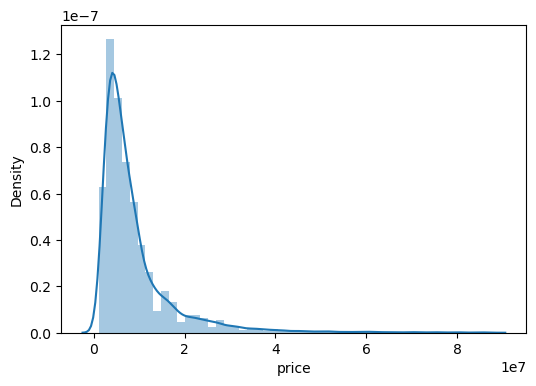

In [37]:
plt.figure(figsize=(6,4))
sns.distplot(data['price'])
plt.show()

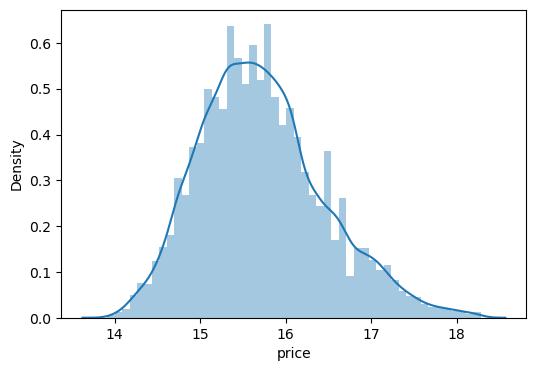

In [38]:
## As we can see that Price column is left skewed. Because majority of data is in left side. As we will use np.log to make it normally distributed

plt.figure(figsize=(6,4))
sns.distplot(np.log1p(data['price']))
plt.show()

In [39]:
data['price'] = np.log1p(data['price'])

In [40]:
data.to_csv("./final_cleaned_train.csv", index=False)

In [41]:
data.head()

,bkh_no,square_ft,resale,longitude,latitude,price,Dealer,Owner
0,2,1300.236407,1,12.969910,77.597960,15.520259,0,1
1,2,1275.000000,1,12.274538,76.644605,15.444751,1,0
2,2,933.159722,1,12.778033,77.632191,15.274126,0,1
3,2,929.921143,1,28.642300,77.344500,15.648092,0,1
4,2,999.009247,1,22.592200,88.484911,15.615569,1,0


In [42]:
ss = StandardScaler()
columns = ["square_ft", "longitude", "latitude"]

data[columns] = ss.fit_transform(data[columns])
data.head()

,bkh_no,square_ft,resale,longitude,latitude,price,Dealer,Owner
0,2,-0.041501,1,-1.305245,0.052240,15.520259,0,1
1,2,-0.079218,1,-1.415177,-0.040450,15.444751,1,0
2,2,-0.590109,1,-1.335579,0.055568,15.274126,0,1
3,2,-0.594949,1,1.172422,0.027597,15.648092,0,1
4,2,-0.491695,1,0.215955,1.110730,15.615569,1,0


In [43]:
X = data.drop(columns=['price'], axis=1)
y = data['price']

X.dropna(inplace=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
X_train.dropna(axis=0, inplace=True)

In [46]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_train_pred = rfr.predict(X_train)
train_acc_rfr = r2_score(y_train, rfr_train_pred)
rfr_test_pred = rfr.predict(X_test)
test_acc_rfr = r2_score(y_test, rfr_test_pred)

print("Train accuracy of RFR :-> ", train_acc_rfr)
print("Test accuracy of RFR :-> ", test_acc_rfr)

Train accuracy of RFR :->  0.9740476196160767
Test accuracy of RFR :->  0.8126882253696491


In [47]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict(X_train)
train_acc_xgb = r2_score(y_train, xgb_train_pred)

xgb_test_pred = xgb.predict(X_test)
test_acc_xgb = r2_score(y_test, xgb_test_pred)

print("Train acc:-> ", train_acc_xgb)
print("Test acc:-> ", test_acc_xgb)

Train acc:->  0.8942625794834907
Test acc:->  0.8411294805481245
